In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-26 20:34:04.404260: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-26 20:34:04.707337: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-26 20:34:05.444971: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [30]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Siluriformes/RJ_Reconstrucao_Siluriformes_2024_08_20.xlsx')

df_Bagre = pd.DataFrame(df[['Ano','Bagre_art','Bagre_ind','Bagre_art_ind']])

#Somando art e ind em art_ind
for i in range(len(df_Bagre['Ano'])):
  if pd.isnull(df_Bagre.iloc[i,3])==True and pd.isnull(df_Bagre.iloc[i,2])==False and pd.isnull(df_Bagre.iloc[i,1])==False:
    df_Bagre.iloc[i,3] = df_Bagre.iloc[i,2] + df_Bagre.iloc[i,1] 


dados = df_Bagre[['Ano','Bagre_art','Bagre_art_ind']].dropna().reset_index(drop=True)

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Bagre_art'] = dados.loc[i,'Bagre_art'] / dados.loc[i,'Bagre_art_ind']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1962,1963,1964,1966,1971,1976,1977])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()



prop = dados['Prop_Bagre_art'].values

dados.head()

,Ano,Bagre_art,Bagre_art_ind,Prop_Bagre_art
0,1978,924.0,972.0,0.950617
1,1979,94.0,139.0,0.676259
2,1980,227.0,342.0,0.663743
3,1981,599.0,763.0,0.785059
4,1982,1113.0,1354.0,0.822009


In [31]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [26]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=200, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Siluriformes/Bagre/pesos prop art/.weights.h5', overwrite=True)

Epoch 1/200


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9851
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9298 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9228 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8478 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8325 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8355 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8607 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8178 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8448 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8726 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8463 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8388 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8554 
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8032 
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8391 
Epoch 16/200
2/2 ━━━━━━━━━━━━━━━

In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Siluriformes/Bagre/pesos prop art/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.98784745]
 [0.97576153]
 [0.96366286]
 [0.9394525 ]
 [0.87857914]
 [0.8152265 ]
 [0.80240804]]


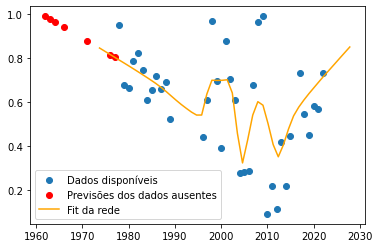

In [32]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

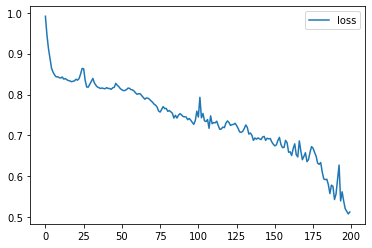

In [28]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [33]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1


df_preenchido = df[['Ano','Bagre_art']]
for i in range(len(prev_continua)):
    if i+1950 in anos_para_prever:
      df_preenchido.loc[i,'Bagre_art']=df.loc[i,'Bagre_art_ind']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Siluriformes/Bagre/Desagregação Bagre_art.xlsx')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
     Ano    Bagre_art
0   1950          NaN
1   1951          NaN
2   1952          NaN
3   1953          NaN
4   1954          NaN
5   1955          NaN
6   1956          NaN
7   1957          NaN
8   1958          NaN
9   1959          NaN
10  1960          NaN
11  1961          NaN
12  1962   599.623413
13  1963   703.524048
14  1964   720.819824
15  1965          NaN
16  1966   571.187134
17  1967          NaN
18  1968          NaN
19  1969          NaN
20  1970          NaN
21  1971   480.582794
22  1972          NaN
23  1973          NaN
24  1974          NaN
25  1975          NaN
26  1976    66.848572
27  1977   324.975250
28  1978   924.000000
29  1979    94.000000
30  1980   227.000000
31  1981   599.000000
32  1982  1113.000000
33  1983   424.000000
34  1984   310.000000
35  1985   633.000000
36  1986   438.000000
37  1987   487.000000
38  1988   435.000000
39  1989   538.000000
40  1990          NaN
41  1991          NaN
42  1992        

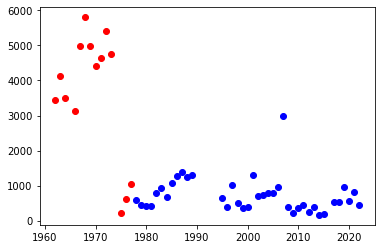

In [8]:
for i in range(len(df_preenchido['Ano'])):
  if i+1950 in anos_para_prever:
    plt.scatter(df_preenchido['Ano'].values[i],df_preenchido['Corvina_art'].values[i],color='red')
  else:
    plt.scatter(df_preenchido['Ano'].values[i],df_preenchido['Corvina_art'].values[i],color='blue')